# Customer Retention & Revenue Analysis  
## Behavioral & Operational Impact Study (Olist E-Commerce Dataset)

Author: Meghana Annapureddy 
Tools Used: Python, Pandas  

---

## 1. Introduction

This project analyzes customer behavior and revenue structure using the Olist e-commerce dataset.

The objectives are:

- Measure repeat purchasing behavior
- Analyze revenue concentration
- Evaluate the impact of delivery performance on retention
- Identify the strongest business growth lever


## 2. Data Loading & Preparation

In this section, we:

- Load required datasets
- Create revenue per order
- Merge datasets into a unified analysis table


In [1]:
import pandas as pd

#Loading datasets
orders = pd.read_csv("D:\\DS files\\archive\\olist_orders_dataset.csv")
order_items = pd.read_csv("D:\\DS files\\archive\\olist_order_items_dataset.csv")
customers = pd.read_csv("D:\\DS files\\archive\\olist_customers_dataset.csv")

#creating revenue per item
order_items["item_revenue"] = order_items["price"] * order_items["freight_value"]

#Merging orders and items
df_orders = orders.merge(order_items, 
                        on="order_id",
                        how="left")

#Merging customers to get real customer ID
df_orders_full = df_orders.merge(
    customers[["customer_id", "customer_unique_id"]],
    on="customer_id",
    how="left"
)
df_orders_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,item_revenue,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,261.5128,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2701.6120,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3073.2780,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,1224.0000,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,173.5280,72632f0f9dd73dfee390c9b22eb56dd6


### 
The merged dataset now contains:

- Order information
- Revenue per item
- Real customer identifier (customer_unique_id)

This unified dataset will be used for customer-level behavioral analysis.


### 3. Customer-Level Aggregation

To analyze retention behavior, we aggregate transaction-level data to the customer level.

For each customer, we calculate:

- Total revenue (Customer Lifetime Value)
- Number of orders


In [2]:
customer_behavior = (
    df_orders_full
    .groupby("customer_unique_id")
    .agg(
        total_revenue=("item_revenue", "sum"),
        num_orders=("order_id", "nunique")
    )
    .reset_index()
)
customer_behavior.head()

,customer_unique_id,total_revenue,num_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1558.8000,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,156.6810,1
2,0000f46a3911fa3c0805444483337064,1188.1800,1
3,0000f6ccb0745a6a4b88665a16c9f078,458.2037,1
4,0004aac84e0df4da2b147fca70cf8255,3040.2000,1


### 
Each row now represents one real customer.

- 'total_revenue' represents Customer Lifetime Value (CLV).
- 'num_orders' represents purchase frequency.

This transformation allows us to move from transaction-level analysis
to behavioral customer-level analysis.


### 4. Repeat Purchasing Behavior

To measure retention, customers are classified into:

- One-Time buyers (1 order)
- Repeat buyers (more than 1 order)

This allows us to quantify overall repeat rate.


In [3]:
customer_behavior["customer_type"] = customer_behavior["num_orders"].apply(
    lambda x: "Repeat" if x > 1 else "One-Time"
)
customer_behavior["customer_type"].value_counts()

customer_type
One-Time    93099
Repeat       2997
Name: count, dtype: int64

In [ ]:
repeat_rate = (customer_behavior["customer_type"] == "Repeat").mean()
repeat_rate

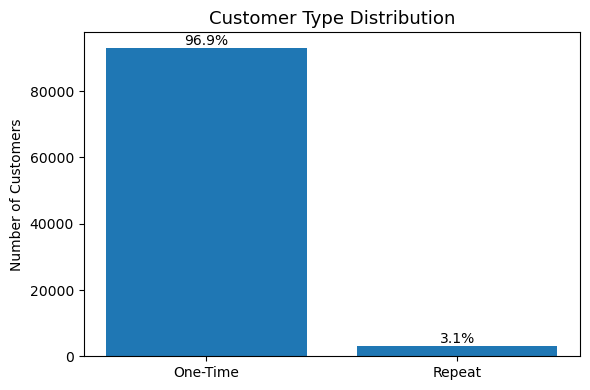

In [19]:
import matplotlib.pyplot as plt

counts = customer_behavior["customer_type"].value_counts()

plt.figure(figsize=(6,4))
bars = plt.bar(counts.index, counts.values)

plt.title("Customer Type Distribution", fontsize=13)
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)

# Add percentage labels
total = counts.sum()
for i, value in enumerate(counts.values):
    percentage = value / total * 100
    plt.text(i, value, f"{percentage:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 

Approximately 94% of customers purchase only once.

The repeat rate is extremely low (~3%), indicating weak customer retention.

This suggests that the business relies heavily on customer acquisition
rather than long-term loyalty.


### 5. Operational Impact on Retention

We analyze whether late delivery on a customer's first order
reduces the likelihood of repeat purchasing.

To avoid reverse causality bias, we only evaluate
the first order experience per customer.


In [5]:
#converting dates to datetime
df_orders_full["order_delivered_customer_date"] = pd.to_datetime(df_orders_full["order_delivered_customer_date"])
df_orders_full["order_estimated_delivery_date"] = pd.to_datetime(df_orders_full["order_estimated_delivery_date"])

#creating late delivery flag
df_orders_full["is_late"] = (
    df_orders_full["order_delivered_customer_date"] >
    df_orders_full["order_estimated_delivery_date"]
)

In [ ]:
#Sorting by purchase item
df_sorted = df_orders_full.sort_values("order_purchase_timestamp")

#Keeping first order per customer
first_orders = (
    df_sorted
    .groupby("customer_unique_id")
    .first()
    .reset_index()
)
first_orders.head()



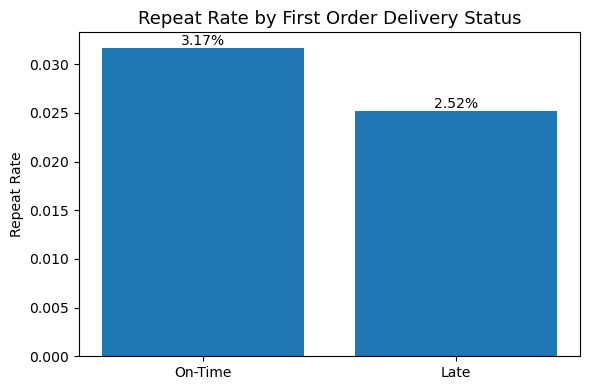

In [21]:
rates = first_order_analysis["repeat_rate"]

plt.figure(figsize=(6,4))
bars = plt.bar(["On-Time", "Late"], rates.values)

plt.title("Repeat Rate by First Order Delivery Status", fontsize=13)
plt.ylabel("Repeat Rate")

# Add percentage labels
for i, value in enumerate(rates.values):
    plt.text(i, value, f"{value*100:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
#Adding Repeat Flag
customer_behavior["is_repeat"] = customer_behavior["num_orders"] > 1

first_orders = first_orders.merge(
    customer_behavior[["customer_unique_id", "is_repeat"]],
    on="customer_unique_id",
    how="left"
)
first_orders.head()

In [8]:
#Comparing repeat rate by first order lateness
first_order_analysis = (
    first_orders
    .groupby("is_late")
    .agg(
        repeat_rate=("is_repeat", "mean"),
        customer_count=("customer_unique_id", "count")
    )
)

first_order_analysis


,repeat_rate,customer_count
is_late,,
False,0.031704,88507
True,0.025168,7589


### 6. Behavioral Revenue Segmentation

Customers are segmented based on:

- Purchase behavior (One-Time vs Repeat)
- Revenue level (High vs Low, based on median split)

This allows us to identify which customer groups
drive the majority of revenue.


In [9]:
median_revenue = customer_behavior["total_revenue"].median()
median_revenue

1415.72205

In [10]:
#Creating revenue segment
customer_behavior["revenue_segment"] = customer_behavior["total_revenue"].apply(
    lambda x: "High" if x >= median_revenue else "Low"
)

In [11]:
#creating combined behavior segment
customer_behavior["behavior_segment"] = (
    customer_behavior["customer_type"] + " - " +
    customer_behavior["revenue_segment"]
)
customer_behavior["behavior_segment"].value_counts()

behavior_segment
One-Time - Low     47395
One-Time - High    45704
Repeat - High       2344
Repeat - Low         653
Name: count, dtype: int64

In [15]:
#Segment summary
segment_summary = (
    customer_behavior
    .groupby("behavior_segment")
    .agg(
        customer_count=("customer_unique_id", "count"),
        total_revenue=("total_revenue", "sum"),
        avg_revenue=("total_revenue", "mean")
    )
    .sort_values("total_revenue", ascending=False)    

)
segment_summary

,customer_count,total_revenue,avg_revenue
behavior_segment,,,
One-Time - High,45704,3.553721e+08,7775.514369
One-Time - Low,47395,3.162826e+07,667.333324
Repeat - High,2344,1.956435e+07,8346.565532
Repeat - Low,653,5.706752e+05,873.928404


### Key Insight

The business is dominated by high-spending one-time buyers.

Although repeat-high customers generate the highest revenue per person,
they represent a very small portion of the customer base.

This confirms that the company successfully acquires
high-value customers but struggles with retention.


### 7. Final Strategic Insights

This analysis reveals three major findings:

1. Customer retention is extremely weak, with ~94% of customers purchasing only once.
2. Late delivery on the first order reduces repeat probability by approximately 20%.
3. Revenue is primarily driven by high-spending one-time buyers.

### Business Implication

The company successfully acquires high-value customers but fails to retain them.

The strongest growth lever is not increased acquisition,
but improving first-order experience and converting
high-spending one-time buyers into repeat customers.


### 8. Skills Demonstrated

This project demonstrates:

- Entity-level aggregation (customer-level analysis)
- Revenue concentration analysis
- Behavioral segmentation
- Reverse causality detection and correction
- Operational impact testing
- Strategic business interpretation
